**Simulating a Quantum Circuit on real IBM Quantum Computer**

**1) Building a Quantum Circuit**

In [5]:
from qiskit import *
from qiskit.tools.visualization import *

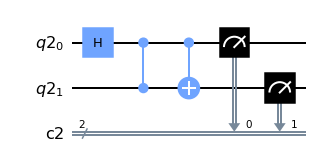

In [6]:
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
ckt=QuantumCircuit(qr,cr)
ckt.h(qr[0])
ckt.cz(qr[0],qr[1])
ckt.cx(qr[0],qr[1])
ckt.measure(qr,cr)
ckt.draw()

**2) Simulating a Quantum Circuit Using Classical Computer**

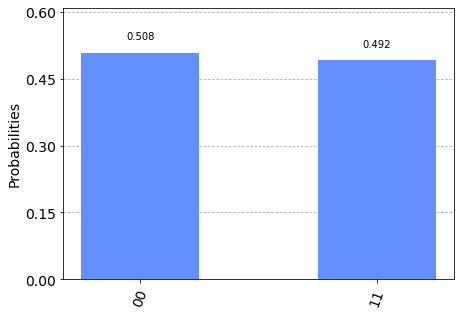

In [7]:
simulator=Aer.get_backend('qasm_simulator')
result=execute(ckt,backend=simulator).result()
plot_histogram(result.get_counts(ckt))

**3) Running on Real Quantum Computer**

In [8]:
    IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
    provider=IBMQ.get_provider(hub='ibm-q',group='open',project='main')
    qcomp=provider.get_backend('ibmq_bogota')
    # You can also try ibmq_manila

In [10]:
job=execute(ckt,backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


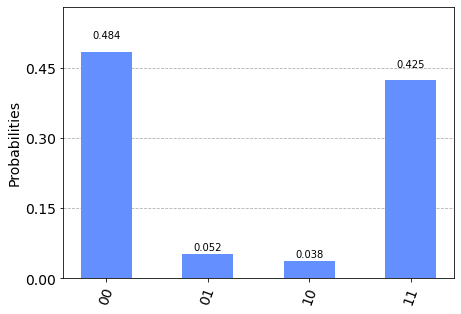

In [11]:
result=job.result()
plot_histogram(result.get_counts(ckt))